In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [33]:
training_input = np.array ([[0,0],[0,1],[1,0],[1,1]])

training_solution = np.array([[0,1,1,0]]).T

training_solution[0]

for i in range(len(training_input)):
    x1 = training_input[i][0]
    print(x1)
    x2 = training_input[i][1]



0
0
1
1


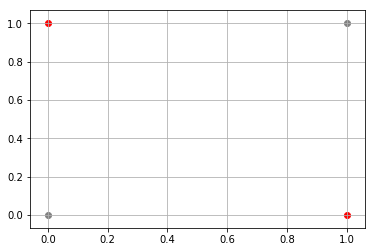

In [3]:
def vis_data():
    plt.grid()

    for i in range(len(training_input)):
        c = 'r'
        if training_solution[i] == 0:
            c = 'grey'
        plt.scatter([training_input[i][0]], [training_input[i][1]], c=c)

vis_data()

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

In [23]:
w13 = 0.5
w14 = 0.9
w23 = 0.4
w24 = 1
w35 = -1.2
w45 = -1.1

w13

0.5

In [6]:
b3 = 0.8
b4 = -0.1
b5 = 0.3

In [47]:
def err(nilai_target, nilai_keluaran):
    return nilai_target - nilai_keluaran

In [48]:
error (0, 0.5)

-0.5

In [56]:
def err_gradien(nilai_keluaran, error):
    return nilai_keluaran*(1-nilai_keluaran)*error

In [57]:
error_gradien(0.5097, -0.5097)

-0.127377042327

In [58]:
def weight_correction(learning_rate, input_terakhir, gradien_error):
    return learning_rate*input_terakhir*gradien_error

In [59]:
weight_correction (0.1, 0.520, -0.1274)

-0.006624800000000001

In [60]:
def update_berat(berat_sebelum, correction): 
    return berat_sebelum + correction

In [81]:
def train():
    w13 = 0.5
    w14 = 0.9
    w23 = 0.4
    w24 = 1
    w35 = -1.2
    w45 = -1.1
    b3 = 0.8
    b4 = -0.1
    b5 = 0.3
    iterations = 100000
    learning_rate = 0.1
    sum_of_squared_error = []
    
    for j in range (iterations):
        sum_of_error = 0;
        for i in range(len(training_input)):
            
            
            x1 = training_input[i][0]
            x2 = training_input[i][1]
            solution = training_solution[i]
            
            y3 = (x1 * w13) + (x2 * w23) - b3 

            y3 = sigmoid(y3)
            y4 = x1*w14 + x2 *w24 - b4 
            y4 = sigmoid(y4)
            y5 = y3*w35 + y4*w45 - b5 
            y5 = sigmoid(y5)
        
            error = err(solution,y5)
            sum_of_error += np.square(error)
            
            error_gradien = err_gradien(y5,error)
            delta_w35 = weight_correction(learning_rate, y3, error_gradien)
            delta_w45 = weight_correction(learning_rate, y4, error_gradien)
            delta_b5 = weight_correction(learning_rate, -1, error_gradien)
            
            error_gradien3 = err_gradien(y3, error_gradien*w35)
            delta_w13 = weight_correction(learning_rate, x1, error_gradien3)
            delta_w23 = weight_correction(learning_rate, x2, error_gradien3)
            delta_b3 = weight_correction(learning_rate, -1, error_gradien3)
            
            error_gradien4 = err_gradien(y4, error_gradien*w45)
            delta_w14 = weight_correction(learning_rate, x1, error_gradien4)
            delta_w24 = weight_correction(learning_rate, x2, error_gradien4)
            delta_b4 = weight_correction(learning_rate, -1, error_gradien4)
            
            w13 = update_berat(w13, delta_w13)
            w14 = update_berat(w14, delta_w14)
            w23 = update_berat(w23, delta_w23)
            w24 = update_berat(w24, delta_w24)
            w35 = update_berat(w35, delta_w35)
            w45 = update_berat(w45, delta_w45)
            b3 = update_berat(b3, delta_b3)
            b4 = update_berat(b4, delta_b4)
            b5 = update_berat(b5, delta_b5)
         
        if j % 100 == 0:
            sum_of_squared_error.append(sum_of_error)
    return sum_of_squared_error,w13, w14, w23, w24, w35, w45, b3, b4, b5

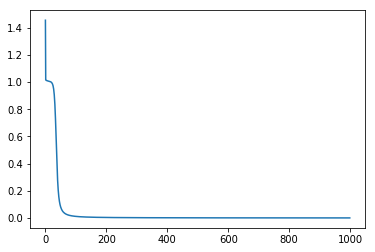

In [82]:
sum_of_squared_error,w13, w14, w23, w24, w35, w45, b3, b4, b5 = train()
fig = plt.plot(sum_of_squared_error)

In [84]:
def prediction(x1,x2):
    solution = training_solution[i]         
    y3 = x1 * w13 + x2 * w23 - b3 
    y3 = sigmoid(y3)
    y4 = x1*w14 + x2*w24 - b4 
    y4 = sigmoid(y4)
    y5 = y3*w35 + y4*w45 - b5 
    y5 = sigmoid(y5)
    return y5
    

In [86]:
prediction(1,1)

array([0.01145075])

In [74]:
y3

-0.4

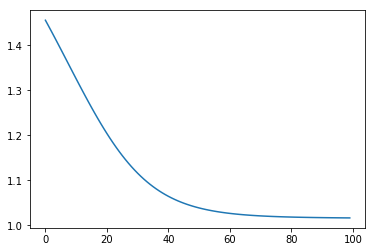

In [75]:
fig = plt.plot(sum_of_squared_error)

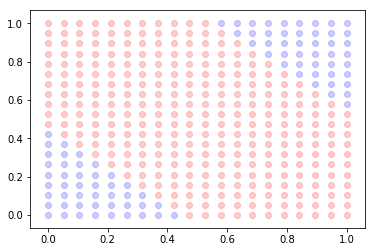

In [87]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        pred = prediction(x,y)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        